In [ ]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset
data = load_iris()

# Convert the data to a pandas DataFrame
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['target'] = data.target


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# Dividing the dataset into target variable and features
X=data.data
y=data.target
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# Hyperparameters
learning_rate = 0.1
iterations = 5000
N = y_train.size
input_size = 4
hidden_size = 2
output_size = 3

np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))


In [ ]:
# Helper functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_error(y_pred, y_true):
    epsilon = 1e-15  # small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip values to avoid log(0)
    error = -np.sum(y_true * np.log(y_pred)) / y_pred.shape[0]
    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Training loop

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error
    ce_error = cross_entropy_error(A2, np.eye(output_size)[y_train])
    acc = accuracy(A2, np.eye(output_size)[y_train])
    new_row = pd.DataFrame({"ce_error": [ce_error], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


In [ ]:
# Test the model

Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))

Test accuracy: 0.95


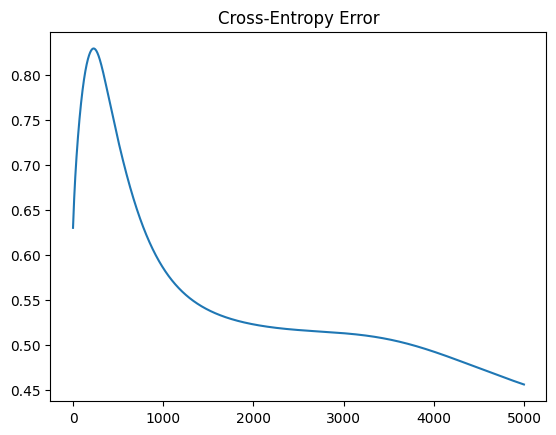

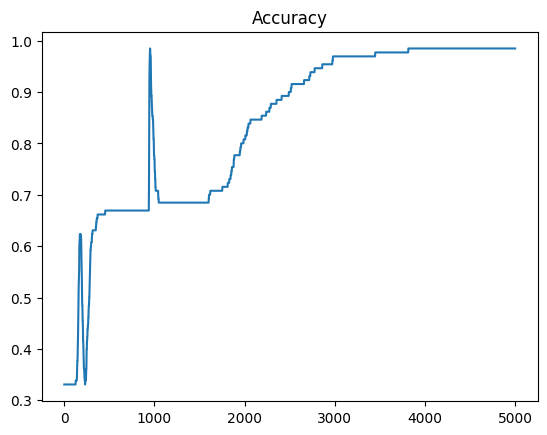

In [ ]:
# Visualizing the results

results.ce_error.plot(title="Cross-Entropy Error")
plt.show()

results.accuracy.plot(title="Accuracy")
plt.show()


In [ ]:
# Make a prediction for a given input feature
input_feature = np.array([[6.1, 3.5, 5.4, 2.2]])  # Example input features
Z1_input = np.dot(input_feature, W1)
A1_input = sigmoid(Z1_input)
Z2_input = np.dot(A1_input, W2)
A2_input = sigmoid(Z2_input)

predicted_class = np.argmax(A2_input)

print("Predicted Class:", predicted_class)

Predicted Class: 2
